# Let's Start At the Beginning

Recently, I've been playing as much **The Cycle: Frontier** as I can reasonably fit into my days along with getting work and projects done. If you're not familiar, it's a First Person Shooter game which focuses around dropping you to a planet in a semi-persistent world with loot and other players. The *Station* has some Corporations which hand out jobs as a pretty thin attempt to get you down to the planet. While down there, other players - who are not on your team - can decide how they want to deal with you: talk to you, lie to you, kill you, help you. I've heard these games be called both **Looter Shooters** as well as **Evac Shooters** and I'm admittidly not the biggest fan of these names.

As you build reputation with the different Corps on the *Station* you can unlock the ability to purchase weapons that each specializes in. Some of them are pretty fun and others are kind of terrible. Today we're going to do part of the process which was inspired by [this article](https://www.datafantic.com/create-an-auto-updating-dataset-on-kaggle-with-deepnote/) by Robert Ritz. In it, he goes over how to setup an automated Data Pipeline using [Kaggle](https://www.kaggle.com) and [Deepnote](https://deepnote.com) together. This part is going to be simply getting the data downloaded, cleaned and some observations about the guns in this game.
I still need to do some more investigation about *Deepnote* - namely the price, utility and such before actually commiting to that part; I *should* be able to simply cut that part out and do the download/upload to *Kaggle* from one of my own servers but if it works then I'm going to use it.

## Scraping and Cleaning Cycle Data

To start with, if you're following along, scraping data from the Cycle's Wiki page is annoying. There are tables inserted inside the tables which caused quite a problem while trying to simply pull the data from the website. So, if you're going to us this as the basis for your own tools then beware that you'll be certain to need to do some custom work.
We'll start with the normal imports for a project like this.

In [343]:
import pandas as pd             # for the data.
import numpy as np              # for a NaN type
import matplotlib.pyplot as plt # For plotting, and some customization of plots.
import seaborn as sns           # For pretty plots.

# Fix the size of the graphs
sns.set(rc={"figure.figsize":(11, 8)})

The website we're going to be using for the data is their official wiki page - which can be found [here](https://thecyclefrontier.wiki/wiki/Main_Page). We'll be pulling from the weapons page which luckily contains a table of all the guns without having to join them. Pandas allows you to read html off a website and will attempt to pull any tables it finds on the webpage. Sadly, due to the nested tables and the way the tables are tagged this simply doesn't work here. But, you can ask `pd.read_html()` to look for an attribute and then pull the data from the page using that; it will still need to end up as a table though otherwise pandas will reject it. After doing quite a bit of exploration, I found that you can pull the total table with the attribute `zebra` as that is the only table which uses it. 

In [344]:

url = "https://thecyclefrontier.wiki/wiki/Weapons"
site = pd.read_html(url, attrs={"class":"zebra"})[0]

In [308]:
site.head()

,Image,Name,Type,Ammo,Faction,Buy Price,Sell Value,Rarity,Weight,Crit Multi,Damage,Pen,Mag Size,Refire Rate,RPM,Reload Time,Move Speed,Proj. Speed
0,NaN,Advocate,AR,Medium,ICA,76000 K-Marks,22781 K-Marks,Epic,35.0,1.7,11.0,26.0,24.0,0.105,571.43,3.2,0.9,29000
1,76000.0,K-Marks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22781.0,K-Marks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AR-55 Autorifle,AR,Medium,Station,1700 K-Marks,524 K-Marks,Common,35.0,1.7,12.0,10.0,22.0,0.110,545.45,2.7,0.9,28000
4,1700.0,K-Marks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can see above that this works but the formatting is still a little messed up. Looking at the tables though, this will be an easy fix since rows which we don't need contain lots `NaN`. If you've never seen this before it just means `Not A Number` and is a special value used by numpy for this. So, let's clean the data for use. You can check a `Series` for these values using `.isna()` and then we'll pass the opposite indexes to pull those out:

In [345]:
data = site[~site.Type.isna()]
data.head()

,Image,Name,Type,Ammo,Faction,Buy Price,Sell Value,Rarity,Weight,Crit Multi,Damage,Pen,Mag Size,Refire Rate,RPM,Reload Time,Move Speed,Proj. Speed
0,NaN,Advocate,AR,Medium,ICA,76000 K-Marks,22781 K-Marks,Epic,35.0,1.7,11.0,26.0,24.0,0.105,571.430,3.20,0.9,29000
3,NaN,AR-55 Autorifle,AR,Medium,Station,1700 K-Marks,524 K-Marks,Common,35.0,1.7,12.0,10.0,22.0,0.110,545.450,2.70,0.9,28000
6,NaN,Asp Flechette Gun,SMG,Light,Osiris,54000 K-Marks,16131 K-Marks,Epic,30.0,1.5,9.0,26.0,20.0,0.095,631.580,2.50,1.0,24000
9,NaN,B9 Trenchgun,Shotgun,Shotgun,Station,1200 K-Marks,371 K-Marks,Common,25.0,1.2,10.0,10.0,5.0,0.950,63.158,2.40,1.0,26000
12,NaN,Basilisk,DMR,Heavy,Osiris,275000 K-Marks,82448 K-Marks,Exotic,50.0,1.6,34.0,28.0,8.0,0.500,120.000,3.85,0.8,45000


Looking much better now. Let's quickly check the data's types and make sure they make sense still.

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 75
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image        0 non-null      float64
 1   Name         26 non-null     object 
 2   Type         26 non-null     object 
 3   Ammo         26 non-null     object 
 4   Faction      26 non-null     object 
 5   Buy Price    26 non-null     object 
 6   Sell Value   26 non-null     object 
 7   Rarity       26 non-null     object 
 8   Weight       26 non-null     float64
 9   Crit Multi   26 non-null     float64
 10  Damage       26 non-null     float64
 11  Pen          26 non-null     float64
 12  Mag Size     26 non-null     float64
 13  Refire Rate  26 non-null     float64
 14  RPM          26 non-null     float64
 15  Reload Time  26 non-null     float64
 16  Move Speed   26 non-null     float64
 17  Proj. Speed  26 non-null     object 
dtypes: float64(10), object(8)
memory usage: 3.9+ KB


Something is wrong with the `Proj. Speed` at this point since it shouldn't be an object but instead should be a number. Checking the values we find that there are string values in here.

In [347]:
# There is a hitscan in there; how should we deal with that?
data['Proj. Speed'].unique()

array(['29000', '28000', '24000', '26000', '45000', '50000', 'Hitscan',
       '30000', '60000', '40000', '70000', '4000', '35000', '34000'],
      dtype=object)

The value of `Hitscan` is preventing the conversion to numbers. I didn't realize any of the guns in this game were hitscan at all.
Which weapons are these?

In [348]:
data[ data['Proj. Speed'] == 'Hitscan' ][['Name', 'Proj. Speed']]

,Name,Proj. Speed
21,Gorgon,Hitscan
75,Zeus Beam,Hitscan


Ok, so we'll need to replace this with something that wont hurt our analysis so we're also going to change these to `np.NaN`.

In [349]:
# Fix hitscan info:
indx = data['Proj. Speed'] == 'Hitscan'
data.loc[indx, 'Proj. Speed'] = np.NaN

There are some other columns - `Sell Value`, `Buy Price` as examples - which have come in as `object` so they're being treated as strings. We need these to be numbers if we end up using them. And, after fixing the Hitscan problem we'll need to convert that column to numbers.

In [350]:

data = data.assign(
    Sell = data['Sell Value'].str.replace(' K-Marks', '').astype('float'),
    Buy = data['Buy Price'].str.replace(' K-Marks', '').astype('float'),
    DPS = data['Refire Rate'] * data['Damage'],
    Faction = data['Faction'].astype('category'),
    Velocity = data['Proj. Speed'].astype('float')
)
data = data.assign(
    perWeight = data['Sell'] / data['Weight']
)

# # This removes the legendary weapons
# data = data.query('Faction != "Printing"')

data = data.drop(labels = ['Sell Value', 'Buy Price', 'Image', 'Proj. Speed'],axis = 1)

Now we've got data to work with!

In [351]:
data.head()

,Name,Type,Ammo,Faction,Rarity,Weight,Crit Multi,Damage,Pen,Mag Size,Refire Rate,RPM,Reload Time,Move Speed,Sell,Buy,DPS,Velocity,perWeight
0,Advocate,AR,Medium,ICA,Epic,35.0,1.7,11.0,26.0,24.0,0.105,571.430,3.20,0.9,22781.0,76000.0,1.155,29000.0,650.885714
3,AR-55 Autorifle,AR,Medium,Station,Common,35.0,1.7,12.0,10.0,22.0,0.110,545.450,2.70,0.9,524.0,1700.0,1.320,28000.0,14.971429
6,Asp Flechette Gun,SMG,Light,Osiris,Epic,30.0,1.5,9.0,26.0,20.0,0.095,631.580,2.50,1.0,16131.0,54000.0,0.855,24000.0,537.700000
9,B9 Trenchgun,Shotgun,Shotgun,Station,Common,25.0,1.2,10.0,10.0,5.0,0.950,63.158,2.40,1.0,371.0,1200.0,9.500,26000.0,14.840000
12,Basilisk,DMR,Heavy,Osiris,Exotic,50.0,1.6,34.0,28.0,8.0,0.500,120.000,3.85,0.8,82448.0,275000.0,17.000,45000.0,1648.960000


## What Do the Weapons Look Like?

A word here about some extra cleaning which I've elected to do. Looking at the data, there are two more problems that should be brought up here. The first is that I'm taking Snipers out of the analysis. The reason for this is that there really are only two of them and everyone understands why they're as powerful as they are.

Text(0.5, 1.0, 'The Reason Snipers Rule')

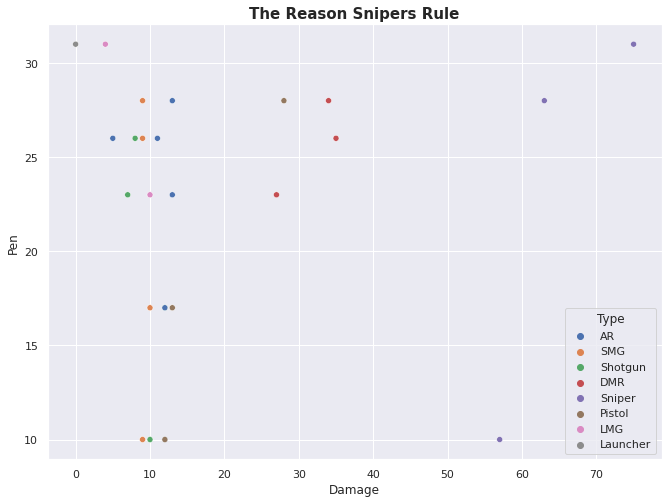

In [352]:
sns.scatterplot(x = data.Damage, y = data['Pen'], hue = data.Type)
plt.title("The Reason Snipers Rule", size=15, fontweight='bold')

The second adjustment is that I'm pulling the ICA Garuntee out of the analysis because it's the only one of its kind.

In [334]:
data.query('Type == "LMG"')[['Name', 'Type']]

,Name,Type
27,ICA Guarantee,LMG


And, the same for the Komrad for the same reason.

In [354]:
data.query('Type == "Launcher"')[['Name', 'Type']]

,Name,Type
45,KOMRAD,Launcher


In [355]:
#| include: false
idx = data.Type == "LMG"
data = data[ ~idx]

idx = data.Type == "Sniper"
data = data[~idx]

idx = data.Type == "Launcher"
data = data[~idx]

So, let's start with what we all care about the most: Damage.

In [382]:
data[['Type', 'Damage']].groupby('Type').mean().sort_values('Damage', ascending=False).T

Type,DMR,Pistol,AR,SMG,Shotgun
Damage,32.0,17.666667,11.0,9.25,9.25


So, DMR's do about twice as much damage as the next category down. From this, we'd expect DMRs to be used quite a bit; what weapons are in this category?

In [383]:
data.query('Type == "DMR"')

,Name,Type,Ammo,Faction,Rarity,Weight,Crit Multi,Damage,Pen,Mag Size,Refire Rate,RPM,Reload Time,Move Speed,Sell,Buy,DPS,Velocity,perWeight
12,Basilisk,DMR,Heavy,Osiris,Exotic,50.0,1.6,34.0,28.0,8.0,0.5,120.0,3.85,0.8,82448.0,275000.0,17.0,45000.0,1648.96
36,KBR Longshot,DMR,Heavy,Korolev,Epic,50.0,1.5,35.0,26.0,12.0,0.6,100.0,3.55,0.9,29776.0,99000.0,21.0,40000.0,595.52
51,Lacerator,DMR,Heavy,ICA,Rare,50.0,1.5,27.0,23.0,16.0,0.4,150.0,2.55,0.9,12203.0,41000.0,10.8,35000.0,244.06


All these weapons get used in my experience - and from watching others play the game. Although, the lowest tier gun in here is `Rare` so that probably helps a lot.
Note that the `Rarity` of a gun informs the `Pen` for the Gun and therefore adds more damage when being fired. So, the higher the tier of `Rarity` therefore the more damage the gun can do per hit - and they have higher damage counts as well.


Considering this, these guns have a limit placed on their Rate of Fire.

In [384]:
data[['Type', 'Refire Rate']].groupby('Type').mean().sort_values('Refire Rate', ascending=False).T

Type,Shotgun,DMR,Pistol,AR,SMG
Refire Rate,0.77625,0.5,0.288333,0.1475,0.08125


This is a match in the order of the columns - ignoring the Shotgun Category. Shotguns have a low damage (per pellet), and a high re-fire rate. That's obviously because the damage per pellet masks how lethal Shotguns are: See any Shattergun Montage basically.

So, it looks like either this was coincidence or they're intentionally using this to offset damage.

Text(0.5, 1.0, 'Damage With Refire Rate')

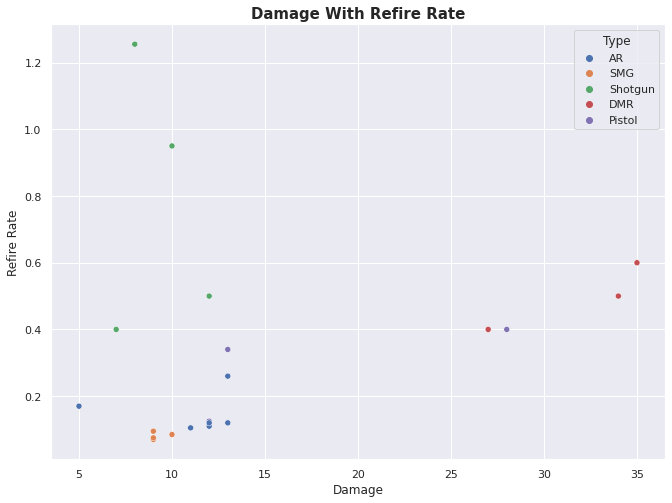

In [400]:
sns.scatterplot(x = data.Damage, y = data['Refire Rate'], hue = data.Type)
plt.title("Damage With Refire Rate", size=15, fontweight='bold')

If we check the relationship, the Damage also quite high against the constraint on the Refire Rate. These guns appear really strong in comparison to everything else - setting aside Snipers of course. But is it really? Let's **Normalize** the Damage column and see if it really is that far out. If you're not familiar with *Normalization* then this is a common process in Machine Learning where the values of a column are scaled based on the minimum and maximum values.

Text(0.5, 1.0, 'Normalized Damage With Normalized Refire Rate')

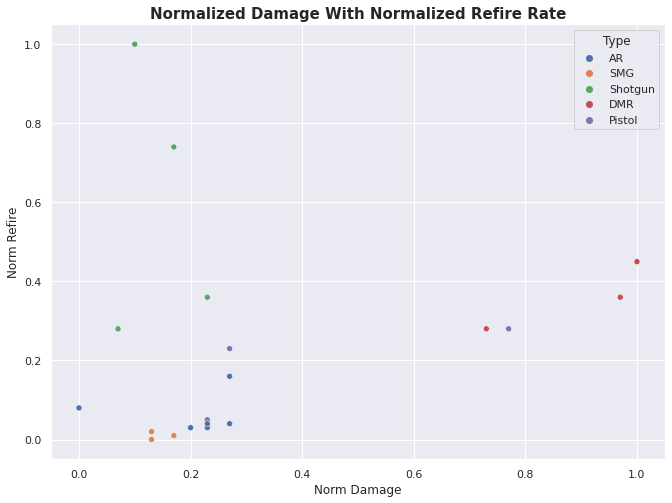

In [412]:
def normalize(column): return ( column - column.min()) / (column.max() - column.min())
round(normalize(data['Refire Rate']).mean(), 2)

# Lets save this and re-plot:
data['Norm Refire'] = round(normalize(data['Refire Rate']), 2)
data['Norm Damage'] = round(normalize(data['Damage']), 2)


# Re-plot:
sns.scatterplot(x = data['Norm Damage'], y = data['Norm Refire'], hue = data.Type)
plt.title("Normalized Damage With Normalized Refire Rate", size=15, fontweight='bold')

 Normalizing doesn't look to have changed anyting aside from the scale so that still looks really solid. And, If we check the **Critical Multiplier** - which is a stand in for `HeadShots` since I believe the Groin also counts - the reward is about average for accuracy.

Text(0.5, 1.0, 'Damage With Critical Multiplier')

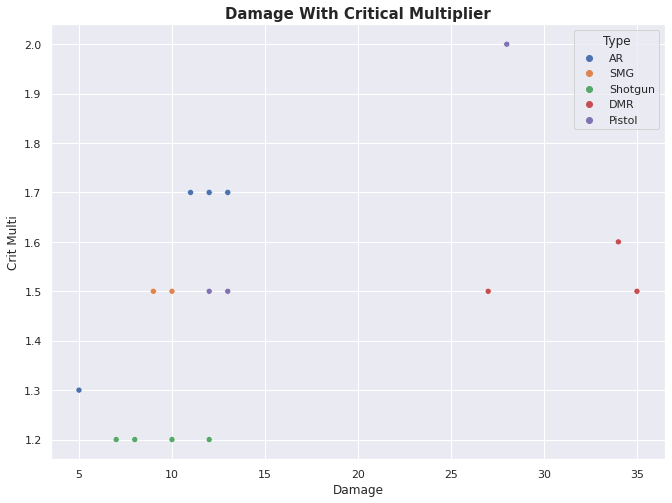

In [401]:
sns.scatterplot(x = data.Damage, y = data['Crit Multi'], hue = data.Type)
plt.title("Damage With Critical Multiplier", size=15, fontweight='bold')

# Conclusions

All in all, the DMR seems like a solid contender for best all around weapon type in the game. If you're going in budget with a single gun then I'd recommend a DMR.
We'll see if this is till true in Season 2.